Compute the performance of MAB methods of pruning Multiple neurons at one time

MAP for choosing multi arms at one time

In [1]:
import numpy as np
import time
import sys
from numpy import *
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
#plt.rcParams['figure.figsize'] = (15, 6)

# Load Bokeh

In [2]:
from bokeh.layouts import row, gridplot
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Legend
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
output_notebook()

Loading BokehJS ...

# Load the data

In [3]:
X_train = np.load('./iris/X_train.npy')
y_train = np.load('./iris/y_train.npy')
X_test = np.load('./iris/X_test.npy')
y_test = np.load('./iris/y_test.npy')
X_deploy = np.load('./iris/X_deploy.npy')
y_deploy = np.load('./iris/y_deploy.npy')
print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))
print('Number of testing examples',len(X_deploy))

Number of training examples 96
Number of validation examples 24
Number of testing examples 30


In [4]:
exec(open("core.py").read())  # pyhton 3x

## Run Thompson Sampling pruning Algorithm

24 test samples


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


Test score: 0.203268691897
Test accuracy: 0.875
The time for running this method is 0.042565107345581055 seconds 
Finsh playing start pruining:
Test accuracy after pruning: 1.0
Test accuracy after pruning: 1.0
Test accuracy after pruning: 1.0
Test accuracy after pruning: 0.966666638851
Test accuracy after pruning: 0.933333337307
Test accuracy after pruning: 0.933333337307
Test accuracy after pruning: 0.933333337307
Test accuracy after pruning: 0.933333337307
Test accuracy after pruning: 0.833333313465
Test accuracy after pruning: 0.666666686535
Test accuracy after pruning: 0.666666686535
Test accuracy after pruning: 0.666666686535
Test accuracy after pruning: 0.366666674614
Test accuracy after pruning: 0.366666674614
Test accuracy after pruning: 0.366666674614
Test accuracy after pruning: 0.366666674614


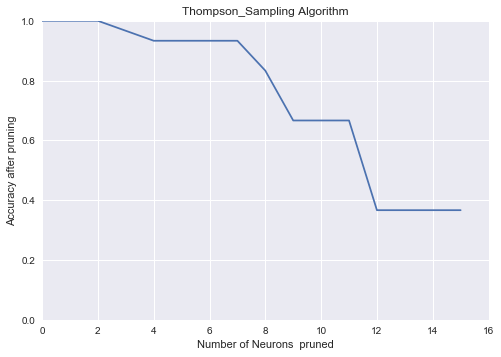

In [5]:
algo = Thompson_Sampling([], [])
Alg_name = 'Thompson_Sampling Algorithm'
path = './Thompson_Sampling/'
sys.path.append("./Thompson_Sampling")
exec(open("mnist_cnnFORTESTING.py").read())

## Run UCB1 pruning Algorithm

24 test samples
Test score: 0.203268691897
Test accuracy: 0.875
The time for running this method is 0.0430600643157959 seconds 
Finsh playing start pruining:
Test accuracy after pruning: 0.966666638851
Test accuracy after pruning: 0.966666638851
Test accuracy after pruning: 0.966666638851
Test accuracy after pruning: 0.966666638851
Test accuracy after pruning: 0.966666638851
Test accuracy after pruning: 0.966666638851
Test accuracy after pruning: 0.966666638851
Test accuracy after pruning: 0.899999976158
Test accuracy after pruning: 0.666666686535
Test accuracy after pruning: 0.666666686535
Test accuracy after pruning: 0.666666686535
Test accuracy after pruning: 0.666666686535
Test accuracy after pruning: 0.366666674614
Test accuracy after pruning: 0.366666674614
Test accuracy after pruning: 0.366666674614
Test accuracy after pruning: 0.366666674614


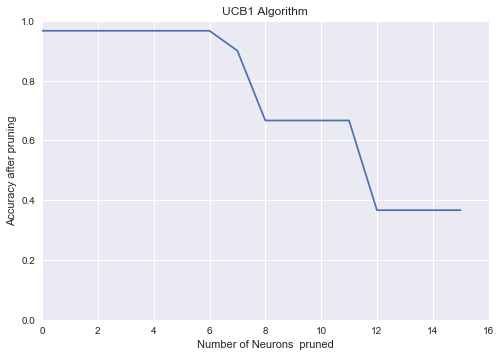

In [6]:
algo = UCB1([], [])
Alg_name = 'UCB1 Algorithm'
path = './UCB1/'
sys.path.append("./UCB1")
exec(open("mnist_cnnFORTESTING.py").read())

# Compare the accuracy

In [7]:
ucb1 = np.load('./UCB1/AccuracyAftrerPrune.npy')
ThompsonSampling = np.load('./Thompson_Sampling/AccuracyAftrerPrune.npy')
Accuracy = np.load('AccuracyBeforePruning.npy')

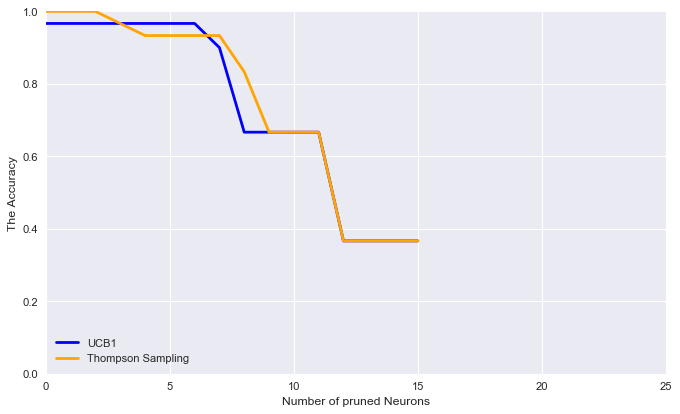

In [8]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(ucb1)
ind = np.arange(N)                # the x locations for the groups
plt.plot(ind , ucb1 , color="blue", linewidth=2.5, linestyle="-", label="UCB1")
plt.plot(ind , ThompsonSampling, color="orange", linewidth=2.5, linestyle="-", label="Thompson Sampling")
plt.legend(loc = 3)
plt.axis([0, 25, 0, 1])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [9]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
p1.line(ind, ucb1, legend="ucb1", line_color="blue", line_width=2)
p1.line(ind, ThompsonSampling, legend="Thompson Sampling", line_color="red", line_width=2)
p1.title.align = "center"
show(p1)

# Comparing All algorithms with the model before pruning

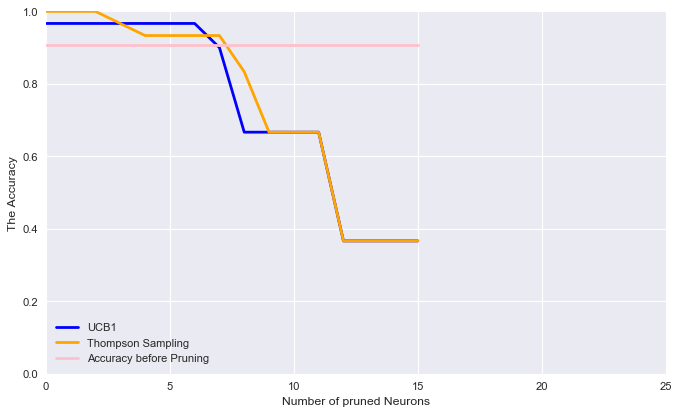

In [10]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(ucb1)
Acc = [Accuracy for col in range(N)]
ind = np.arange(N)                # the x locations for the groups
plt.plot(ind , ucb1 , color="blue", linewidth=2.5, linestyle="-", label="UCB1")
plt.plot(ind , ThompsonSampling, color="orange", linewidth=2.5, linestyle="-", label="Thompson Sampling")
plt.plot(ind , Acc, color="pink", linewidth=2.5, linestyle="-", label="Accuracy before Pruning")
plt.legend(loc = 3)
plt.axis([0, 25, 0, 1])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [11]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
p1.line(ind, ucb1, legend="ucb1", line_color="green", line_width=2)
p1.line(ind, ThompsonSampling, legend="Thompson Sampling", line_color="red", line_width=2)
p1.line(ind, Acc, legend="Accuracy", line_dash=(4, 4), line_color="blue", line_width=2)
p1.title.align = "center"
show(p1)